In [186]:
import torch
import pykeen
import pandas as pd
from pykeen import predict
from pykeen.pipeline import pipeline_from_config
from pykeen.triples import TriplesFactory
import numpy as np
from pykeen.utils import set_random_seed
from matplotlib import pyplot as plt
import json


file_path = 'C.1_query.tsv'
tf = TriplesFactory.from_path(file_path, delimiter="\t")
training, testing = tf.split([0.85, 0.15], random_state=2025)
training, validation = training.split([0.8, 0.2], random_state=2025)
device = "cuda" if torch.cuda.is_available() else "cpu"

pd.set_option('display.max_columns', None)


def graph_display(x, y, title):
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.plot(x, y, '-o')
    plt.xlabel('Trial Number')
    plt.ylabel('Objective Metric Value')
    plt.title(title)
    plt.grid(True)  # Optional: add grid for readability
    plt.xticks(x)
    plt.show()


INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [818, 194]
INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [599, 219]


## Choose the best hyperparameter configuration for each model

In [187]:
transHResults = pd.read_csv('transh_hpo_result/trials.tsv', sep='\t')
rotatEResults = pd.read_csv('rotate_hpo_result/trials.tsv', sep='\t')
complExResults = pd.read_csv('complex_hpo_result/trials.tsv', sep='\t')
convKBResults = pd.read_csv('convkb_hpo_result/trials.tsv', sep='\t')

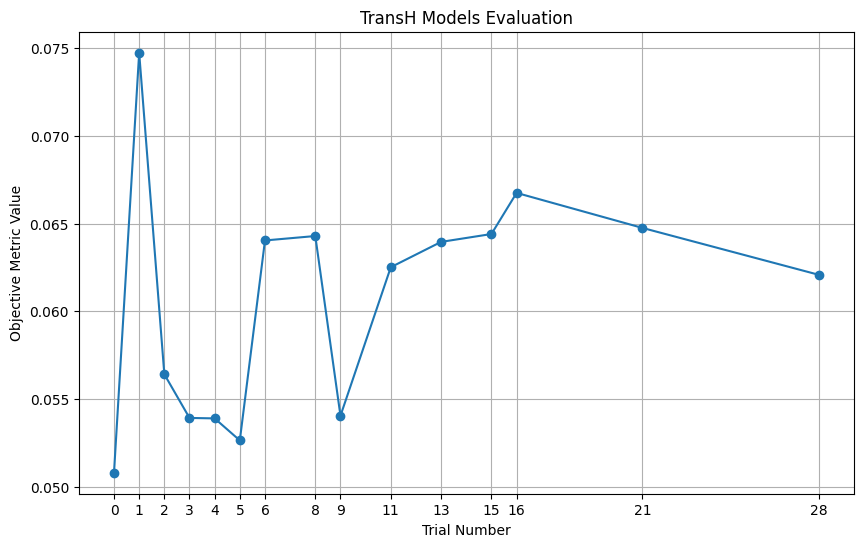

In [188]:
transHResults = transHResults[['number', 'value', 'params_loss.margin', 'params_model.embedding_dim', 'params_model.scoring_fct_norm',
                'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr', 'params_optimizer.weight_decay', 
                'params_regularizer.weight', 'params_training.batch_size', 'params_training.num_epochs', 'state']]
transHResults = transHResults[transHResults.state=='COMPLETE']
transHResults
graph_display(transHResults.number, transHResults.value, 'TransH Models Evaluation')

In [189]:
transHResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
transHResults.sort_values('value', ascending=False)

,number,value,loss.margin,model.embedding_dim,model.scoring_fct_norm,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,regularizer.weight,training.batch_size,training.num_epochs,state
1,1,0.074748,0.211326,192,2,4,0.000655,0.000231,0.646674,16,100,COMPLETE
16,16,0.066754,0.423092,192,2,7,0.000512,0.000240,0.219633,16,50,COMPLETE
21,21,0.064757,0.379644,192,2,7,0.000490,0.000279,0.209543,16,50,COMPLETE
15,15,0.064409,0.383227,192,2,7,0.000470,0.000261,0.235759,16,50,COMPLETE
8,8,0.064294,1.282431,256,1,4,0.000212,0.000413,0.334880,32,100,COMPLETE
6,6,0.064042,2.113911,256,1,1,0.000446,0.000694,0.335732,128,150,COMPLETE
13,13,0.063960,0.956342,256,2,7,0.000178,0.000135,0.649678,64,50,COMPLETE
11,11,0.062516,0.767670,256,2,4,0.000152,0.000321,0.778021,16,50,COMPLETE
28,28,0.062086,0.285003,192,2,4,0.000422,0.000262,0.705208,16,100,COMPLETE
2,2,0.056411,1.435415,128,1,4,0.000127,0.000433,0.628127,128,100,COMPLETE


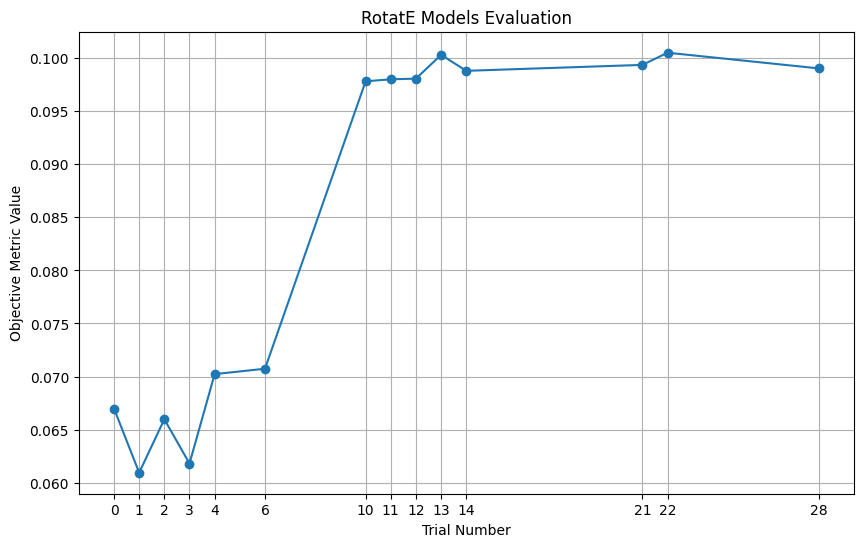

In [190]:
rotatEResults = rotatEResults[['number', 'value', 'params_loss.margin', 'params_model.embedding_dim', 
                               'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr', 'params_optimizer.weight_decay', 
                               'params_training.batch_size', 'params_training.num_epochs', 'state']]
rotatEResults = rotatEResults[rotatEResults.state=='COMPLETE']
graph_display(rotatEResults.number, rotatEResults.value, 'RotatE Models Evaluation')

In [191]:
rotatEResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
rotatEResults.sort_values('value', ascending=False)

,number,value,loss.margin,model.embedding_dim,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,training.batch_size,training.num_epochs,state
22,22,0.100515,2.625342,256,7,0.000991,0.000634,16,150,COMPLETE
13,13,0.100317,2.635355,256,7,0.000959,0.000458,16,150,COMPLETE
21,21,0.099369,2.682686,256,7,0.000994,0.000581,16,150,COMPLETE
28,28,0.099041,1.393301,256,7,0.000789,0.000538,16,150,COMPLETE
14,14,0.098809,2.413542,256,7,0.000967,0.000446,16,150,COMPLETE
12,12,0.098073,2.879203,256,7,0.000900,0.000492,16,150,COMPLETE
11,11,0.098010,2.953763,256,7,0.000789,0.000493,16,150,COMPLETE
10,10,0.097822,2.873567,256,7,0.000787,0.000478,16,150,COMPLETE
6,6,0.070732,2.820913,128,4,0.000341,0.000162,64,50,COMPLETE
4,4,0.070225,1.063350,128,10,0.000259,0.000107,256,100,COMPLETE


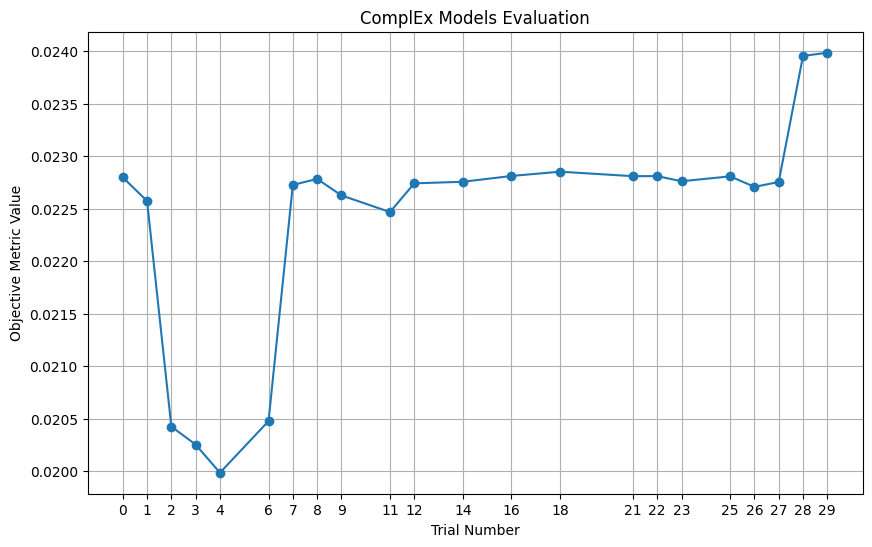

In [192]:
complExResults = complExResults[['number', 'value', 'params_model.embedding_dim', 
                               'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr', 'params_optimizer.weight_decay', 
                               'params_training.batch_size', 'params_training.num_epochs', 'state']]
complExResults = complExResults[complExResults.state=='COMPLETE']
graph_display(complExResults.number, complExResults.value, 'ComplEx Models Evaluation')

In [193]:
complExResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
complExResults.sort_values('value', ascending=False)

,number,value,model.embedding_dim,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,training.batch_size,training.num_epochs,state
29,29,0.023987,192,1,0.000725,0.000585,16,50,COMPLETE
28,28,0.023956,192,1,0.000611,0.000587,16,50,COMPLETE
18,18,0.022853,256,1,0.000534,0.000800,32,100,COMPLETE
16,16,0.022812,256,1,0.000185,0.000975,32,100,COMPLETE
22,22,0.022811,256,1,0.000323,0.000814,32,100,COMPLETE
21,21,0.022810,256,1,0.000313,0.000858,32,100,COMPLETE
25,25,0.022809,256,1,0.000373,0.000869,32,100,COMPLETE
0,0,0.022799,256,1,0.000189,0.000264,128,150,COMPLETE
8,8,0.022784,256,7,0.000214,0.000480,512,150,COMPLETE
23,23,0.022762,256,1,0.000508,0.000666,32,100,COMPLETE


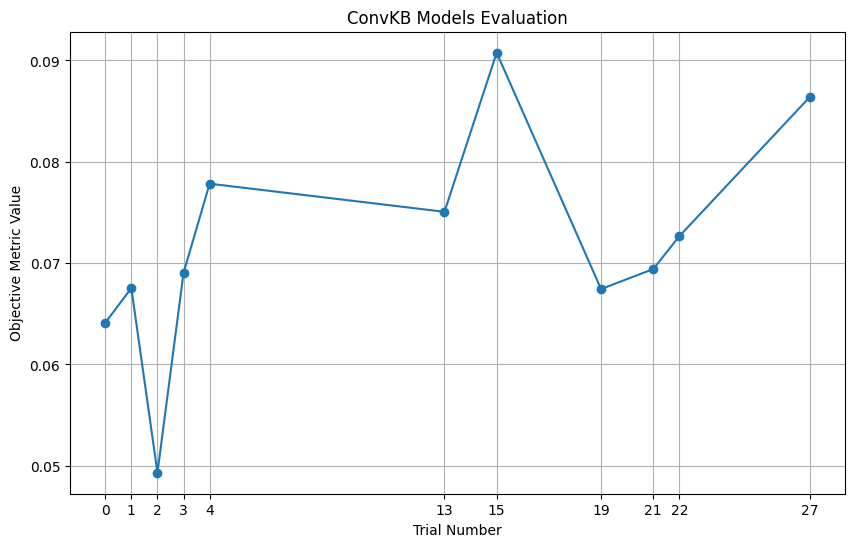

In [194]:
convKBResults = convKBResults[['number', 'value', 'params_loss.margin', 'params_model.embedding_dim', 'params_model.hidden_dropout_rate',
                               'params_model.num_filters', 'params_negative_sampler.num_negs_per_pos', 'params_optimizer.lr',
                               'params_optimizer.weight_decay', 'params_regularizer.weight', 'params_training.batch_size', 
                               'params_training.num_epochs', 'state']]
convKBResults = convKBResults[convKBResults.state=='COMPLETE']
graph_display(convKBResults.number, convKBResults.value, 'ConvKB Models Evaluation')

In [195]:
convKBResults.rename(columns=lambda x: x.replace("params_", "") if x.startswith("params_") else x, inplace=True)
convKBResults.sort_values('value', ascending=False)

,number,value,loss.margin,model.embedding_dim,model.hidden_dropout_rate,model.num_filters,negative_sampler.num_negs_per_pos,optimizer.lr,optimizer.weight_decay,regularizer.weight,training.batch_size,training.num_epochs,state
15,15,0.090764,0.537169,192,0.4,96,7,0.000305,0.000113,0.677800,128,50,COMPLETE
27,27,0.086395,1.080887,192,0.5,96,7,0.000819,0.000115,0.014189,128,100,COMPLETE
4,4,0.077837,0.523149,192,0.5,128,4,0.000832,0.000180,0.356422,256,100,COMPLETE
13,13,0.075063,0.836633,192,0.4,96,7,0.000646,0.000188,0.636472,128,50,COMPLETE
22,22,0.072651,0.304956,192,0.4,96,7,0.000790,0.000136,0.637006,128,50,COMPLETE
21,21,0.069412,0.771865,192,0.4,96,7,0.000671,0.000190,0.656400,128,50,COMPLETE
3,3,0.069032,2.313529,256,0.4,96,4,0.000471,0.000515,0.570392,2048,50,COMPLETE
1,1,0.067534,2.327305,192,0.5,128,1,0.000723,0.000263,0.745621,32,50,COMPLETE
19,19,0.067440,1.005561,192,0.4,128,4,0.000283,0.000132,0.169457,16,50,COMPLETE
0,0,0.064109,2.270190,256,0.5,64,7,0.000388,0.000158,0.129545,512,150,COMPLETE


## Evaluate the best model

In [196]:
def get_best_hyperparameter(best_params_path):
    with open(best_params_path) as f:
        config = json.load(f)
    config['pipeline']['training'] = training
    config['pipeline']['testing'] = testing
    config['pipeline']['validation'] = validation   
    config['pipeline']['device'] = device
    config['pipeline']['random_seed'] = 2025

    return pipeline_from_config(config=config)


def get_results(pipeline_result, model_name, metric = ['inverse_harmonic_mean_rank', 'variance', 'arithmetic_mean_rank', 'hits_at_5']):
    results = pipeline_result.metric_results.to_df()
    results = results[(results.Side == 'both') & (results.Rank_type == 'realistic') & (results.Metric.isin(metric))]

    results = results[['Metric', 'Value']].set_index('Metric')
    results.index.name = 'Model'
    results = results.T
    results.rename(index={'Value': model_name}, inplace=True)
    return results

In [197]:
best_rotate = get_best_hyperparameter('rotate_hpo_result/best_pipeline/pipeline_config.json')

INFO:pykeen.pipeline.api:Using device: cuda
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


Training epochs on cuda:0:   0%|          | 0/120 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/55.0 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/194 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds


In [198]:
best_rotate_results = get_results(best_rotate, 'RotatE')
best_rotate_results

Model,variance,arithmetic_mean_rank,inverse_harmonic_mean_rank,hits_at_5
RotatE,4808.25,63.502579,0.098996,0.149485
